# **Semana 15: Proyecto Final Integrador**

## **Análisis Completo de Rendimiento Deportivo**

### **Bloque 3: Análisis Avanzado y Modelado - CAPSTONE PROJECT**

---

**Objetivos del Proyecto:**
- Integrar TODAS las técnicas aprendidas en el curso
- Crear un pipeline completo de Machine Learning
- Desarrollar un sistema de recomendaciones deportivas
- Presentar insights accionables para entrenadores
- Demostrar dominio completo de la Ciencia de Datos

**Pipeline Completo:**
- **Exploración**: Análisis descriptivo y visualización
- **Preprocessing**: Limpieza y Feature Engineering
- **Modelado**: Múltiples algoritmos y optimización
- **Evaluación**: Métricas avanzadas y validación
- **Insights**: Recomendaciones prácticas

---

### **Caso de Estudio: Optimización de Equipo de Fútbol**

**Contexto**: Eres el **Director Técnico** de un club profesional. Tu misión es:
1. **Analizar** el rendimiento actual de los jugadores
2. **Predecir** el potencial futuro de cada jugador
3. **Recomendar** estrategias de mejora y fichajes
4. **Optimizar** la formación y tácticas del equipo

---

## **1. Configuración del Laboratorio de Análisis**

### **Arsenal Completo de Herramientas**

En este proyecto final integraremos TODAS las herramientas que hemos dominado:

**Exploración y Visualización:**
- Pandas, NumPy para manipulación de datos
- Matplotlib, Seaborn para visualización avanzada
- Plotly para gráficos interactivos

**Machine Learning:**
- Scikit-learn para modelado completo
- Múltiples algoritmos (RF, SVM, Logistic, etc.)
- Ensemble methods y stacking

**Feature Engineering:**
- Creación de variables sintéticas
- Selección automática de características
- Transformaciones matemáticas avanzadas

**Optimización:**
- Grid Search y Random Search
- Validación cruzada robusta
- Métricas de evaluación completas

In [1]:
# ========================================
# LABORATORIO DE CIENCIA DE DATOS
# ========================================

# === IMPORTACIONES BÁSICAS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Plotly para gráficos interactivos (opcional)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.io as pio
    pio.templates.default = "plotly_white"
    PLOTLY_AVAILABLE = True
except ImportError:
    print("Plotly no disponible. Usando solo matplotlib y seaborn.")
    PLOTLY_AVAILABLE = False
import warnings
warnings.filterwarnings('ignore')

# === MACHINE LEARNING ===
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                   GridSearchCV, RandomizedSearchCV, StratifiedKFold)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE, RFECV
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                            VotingClassifier, AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# === MÉTRICAS Y EVALUACIÓN ===
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           precision_score, recall_score, f1_score, roc_auc_score,
                           roc_curve, precision_recall_curve, auc)

# === UTILIDADES ESTADÍSTICAS ===
from scipy import stats
from scipy.stats import uniform, randint

# === CONFIGURACIÓN DE VISUALIZACIÓN ===
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True

print("¡LABORATORIO DE CIENCIA DE DATOS ACTIVADO!")
print("="*50)
print("Todas las herramientas cargadas correctamente")
print("Listo para el PROYECTO FINAL INTEGRADOR")
print("="*50)

Plotly no disponible. Usando solo matplotlib y seaborn.
¡LABORATORIO DE CIENCIA DE DATOS ACTIVADO!
Todas las herramientas cargadas correctamente
Listo para el PROYECTO FINAL INTEGRADOR
¡LABORATORIO DE CIENCIA DE DATOS ACTIVADO!
Todas las herramientas cargadas correctamente
Listo para el PROYECTO FINAL INTEGRADOR


## **2. Generación del Dataset Deportivo Completo**

    "### **Simulando una Liga Profesional Real**
",

Vamos a crear un dataset más realista y complejo que simule una **liga de fútbol profesional** con:

- **1500 jugadores** de diferentes equipos y posiciones
-     "- **Múltiples temporadas** de datos históricos  
",  
    "- **Variables complejas** con relaciones no lineales
",
- **Factores contextuales** (clima, rival, presión)
- **Variables económicas** (salario, valor de mercado)

Este será nuestro **laboratorio completo** para demostrar TODAS las técnicas aprendidas.

In [2]:
# ========================================
# GENERADOR DE LIGA PROFESIONAL
# ========================================

print("Construyendo Liga Profesional Simulada...")
print("="*50)

# Configurar semilla para reproducibilidad
np.random.seed(42)

# === PARÁMETROS DE LA LIGA ===
n_jugadores = 1500
n_equipos = 20
n_temporadas = 3
posiciones = ['Portero', 'Defensa', 'Centrocampista', 'Delantero']
equipos = [f'Club_{i:02d}' for i in range(1, n_equipos + 1)]

# === VARIABLES BASE ===
data_complete = {
    # IDENTIFICACIÓN
    'jugador_id': range(1, n_jugadores + 1),
    'equipo': np.random.choice(equipos, n_jugadores),
    'posicion': np.random.choice(posiciones, n_jugadores),
    'temporada': np.random.choice([2022, 2023, 2024], n_jugadores),
    
    # CARACTERÍSTICAS FÍSICAS
    'edad': np.random.randint(18, 37, n_jugadores),
    'altura': np.random.normal(178, 8, n_jugadores),
    'peso': np.random.normal(75, 10, n_jugadores),
    
    # HABILIDADES TÉCNICAS (0-100)
    'velocidad': np.random.normal(70, 15, n_jugadores),
    'resistencia': np.random.normal(75, 12, n_jugadores),
    'fuerza': np.random.normal(72, 13, n_jugadores),
    'precision': np.random.normal(68, 16, n_jugadores),
    'vision_juego': np.random.normal(65, 18, n_jugadores),
    'tecnica': np.random.normal(70, 14, n_jugadores),
    
    # ESTADÍSTICAS DE JUEGO
    'partidos_jugados': np.random.randint(5, 40, n_jugadores),
    'minutos_jugados': np.random.randint(200, 3500, n_jugadores),
    'goles': np.random.randint(0, 25, n_jugadores),
    'asistencias': np.random.randint(0, 18, n_jugadores),
    'tarjetas_amarillas': np.random.randint(0, 12, n_jugadores),
    'tarjetas_rojas': np.random.randint(0, 3, n_jugadores),
    
    # FACTORES CONTEXTUALES
    'experiencia_anos': np.random.randint(0, 18, n_jugadores),
    'lesiones_temporada': np.random.randint(0, 4, n_jugadores),
    'partidos_internacionales': np.random.randint(0, 15, n_jugadores),
    
    # VARIABLES ECONÓMICAS
    'salario_miles': np.random.lognormal(7, 1.5, n_jugadores),  # Log-normal para realismo
    'valor_mercado_millones': np.random.lognormal(1, 1.2, n_jugadores),
    
    # MÉTRICAS AVANZADAS
    'pases_completados': np.random.randint(100, 2500, n_jugadores),
    'pases_totales': np.random.randint(120, 2800, n_jugadores),
    'duelos_ganados': np.random.randint(20, 200, n_jugadores),
    'duelos_totales': np.random.randint(25, 250, n_jugadores),
    'distancia_recorrida_km': np.random.normal(8.5, 2.1, n_jugadores)
}

# Crear DataFrame inicial
df_liga = pd.DataFrame(data_complete)

# === AJUSTES POR POSICIÓN ===
print("Aplicando ajustes realistas por posición...")

# Porteros: más altos, menos goles, más paradas
porteros_mask = df_liga['posicion'] == 'Portero'
df_liga.loc[porteros_mask, 'altura'] += np.random.normal(8, 3, porteros_mask.sum())
df_liga.loc[porteros_mask, 'goles'] = np.random.randint(0, 2, porteros_mask.sum())
df_liga.loc[porteros_mask, 'velocidad'] -= np.random.randint(5, 15, porteros_mask.sum())

# Delanteros: más goles, menos pases defensivos
delanteros_mask = df_liga['posicion'] == 'Delantero'
df_liga.loc[delanteros_mask, 'goles'] += np.random.randint(3, 10, delanteros_mask.sum())
df_liga.loc[delanteros_mask, 'precision'] += np.random.randint(5, 12, delanteros_mask.sum())

# Defensas: más fuerza, menos goles
defensas_mask = df_liga['posicion'] == 'Defensa'
df_liga.loc[defensas_mask, 'fuerza'] += np.random.randint(3, 8, defensas_mask.sum())
df_liga.loc[defensas_mask, 'goles'] = np.maximum(0, df_liga.loc[defensas_mask, 'goles'] - np.random.randint(2, 6, defensas_mask.sum()))

# Centrocampistas: más pases, mejor visión
centros_mask = df_liga['posicion'] == 'Centrocampista'
df_liga.loc[centros_mask, 'vision_juego'] += np.random.randint(5, 15, centros_mask.sum())
df_liga.loc[centros_mask, 'asistencias'] += np.random.randint(2, 8, centros_mask.sum())

# === LIMITAR RANGOS REALISTAS ===
# Habilidades entre 0-100
for col in ['velocidad', 'resistencia', 'fuerza', 'precision', 'vision_juego', 'tecnica']:
    df_liga[col] = np.clip(df_liga[col], 0, 100)

# Altura realista
df_liga['altura'] = np.clip(df_liga['altura'], 160, 210)

# === CREAR VARIABLE OBJETIVO COMPLEJA ===
print("Calculando índice de rendimiento integral...")

# Índice de rendimiento basado en múltiples factores
rendimiento_base = (
    (df_liga['goles'] / (df_liga['partidos_jugados'] + 1)) * 0.25 +
    (df_liga['asistencias'] / (df_liga['partidos_jugados'] + 1)) * 0.20 +
    (df_liga['precision'] / 100) * 0.15 +
    (df_liga['vision_juego'] / 100) * 0.15 +
    (df_liga['tecnica'] / 100) * 0.15 +
    ((df_liga['minutos_jugados'] / df_liga['partidos_jugados']) / 90) * 0.10
)

# Ajustar por experiencia y lesiones
factor_experiencia = 1 + (df_liga['experiencia_anos'] / 100)
factor_lesiones = 1 - (df_liga['lesiones_temporada'] / 10)

rendimiento_final = rendimiento_base * factor_experiencia * factor_lesiones

# Crear categorías de rendimiento
df_liga['rendimiento'] = pd.cut(rendimiento_final, 
                               bins=[0, 0.3, 0.6, 0.8, 1.0], 
                               labels=['Bajo', 'Medio', 'Alto', 'Elite'])

print("Liga profesional generada exitosamente!")
print(f"{len(df_liga)} jugadores en {len(df_liga['equipo'].unique())} equipos")
print(f"Distribución de rendimiento:")
print(df_liga['rendimiento'].value_counts())
print(f"Variables totales: {len(df_liga.columns)}")

# Mostrar muestra
df_liga.head(10)

Construyendo Liga Profesional Simulada...
Aplicando ajustes realistas por posición...
Calculando índice de rendimiento integral...
Liga profesional generada exitosamente!
1500 jugadores en 20 equipos
Distribución de rendimiento:
rendimiento
Medio    838
Alto     338
Elite    127
Bajo      37
Name: count, dtype: int64
Variables totales: 30
Calculando índice de rendimiento integral...
Liga profesional generada exitosamente!
1500 jugadores en 20 equipos
Distribución de rendimiento:
rendimiento
Medio    838
Alto     338
Elite    127
Bajo      37
Name: count, dtype: int64
Variables totales: 30


,jugador_id,equipo,posicion,temporada,edad,altura,peso,velocidad,resistencia,fuerza,...,lesiones_temporada,partidos_internacionales,salario_miles,valor_mercado_millones,pases_completados,pases_totales,duelos_ganados,duelos_totales,distancia_recorrida_km,rendimiento
0,1,Club_07,Defensa,2023,27,166.536487,72.061464,62.652321,68.201244,66.991819,...,0,3,275.965370,6.250408,1784,1168,106,239,7.699583,Medio
1,2,Club_20,Centrocampista,2024,21,178.095426,75.398575,74.718663,100.000000,89.426260,...,1,0,910.428340,1.119455,599,1178,107,104,11.721167,Alto
2,3,Club_15,Delantero,2024,29,186.223057,68.941755,81.090191,71.420030,61.076723,...,0,4,6675.644762,0.700992,173,1091,190,133,8.465310,Medio
3,4,Club_11,Delantero,2023,19,172.779927,87.282284,60.891174,64.618640,66.815898,...,1,0,1116.143988,0.791591,2296,2510,56,165,8.880912,Medio
4,5,Club_08,Centrocampista,2024,36,176.152540,87.644685,61.108697,75.653127,78.123146,...,0,10,27721.034546,1.258214,1660,1107,142,191,6.766826,Elite
5,6,Club_07,Delantero,2022,22,183.478742,71.175098,90.539934,72.828707,60.557597,...,0,13,5225.568504,0.678850,991,1509,83,55,8.548374,NaN
6,7,Club_19,Delantero,2022,25,170.278139,70.077745,68.809170,71.141846,74.940131,...,1,10,1708.243502,3.855656,1989,1479,172,176,5.308639,Elite
7,8,Club_11,Defensa,2023,24,173.109845,73.687653,77.637082,97.491313,79.935455,...,0,7,985.021930,0.739917,1177,2624,138,152,5.587782,Medio
8,9,Club_11,Portero,2022,31,179.174001,72.999194,66.523416,61.443026,63.882097,...,3,1,519.828637,5.900434,1346,1018,169,103,8.666491,Medio
9,10,Club_04,Portero,2023,20,195.535626,69.074981,44.030186,75.449245,68.635857,...,1,8,1371.881668,1.476473,572,1933,190,29,8.983384,Medio


    "## **3. Análisis Exploratorio Integral**
",

    "### **Dashboard de Inteligencia Deportiva**
",

Como **Director Técnico**, necesitas entender profundamente tu liga antes de tomar decisiones. Realizaremos un análisis exploratorio que combine TODAS las técnicas aprendidas:

**Objetivos del Análisis:**

1. **Distribuciones**: ¿Cómo se distribuyen las habilidades?
2. **Correlaciones**: ¿Qué variables están relacionadas?
3. **Análisis por Posición**: ¿Cómo difieren los perfiles?
4. **Análisis Económico**: ¿Rendimiento vs Salario?
5. **Identificación de Talentos**: ¿Quiénes son las estrellas ocultas?

Iniciando Análisis Exploratorio Integral
1. Análisis de Distribuciones Clave


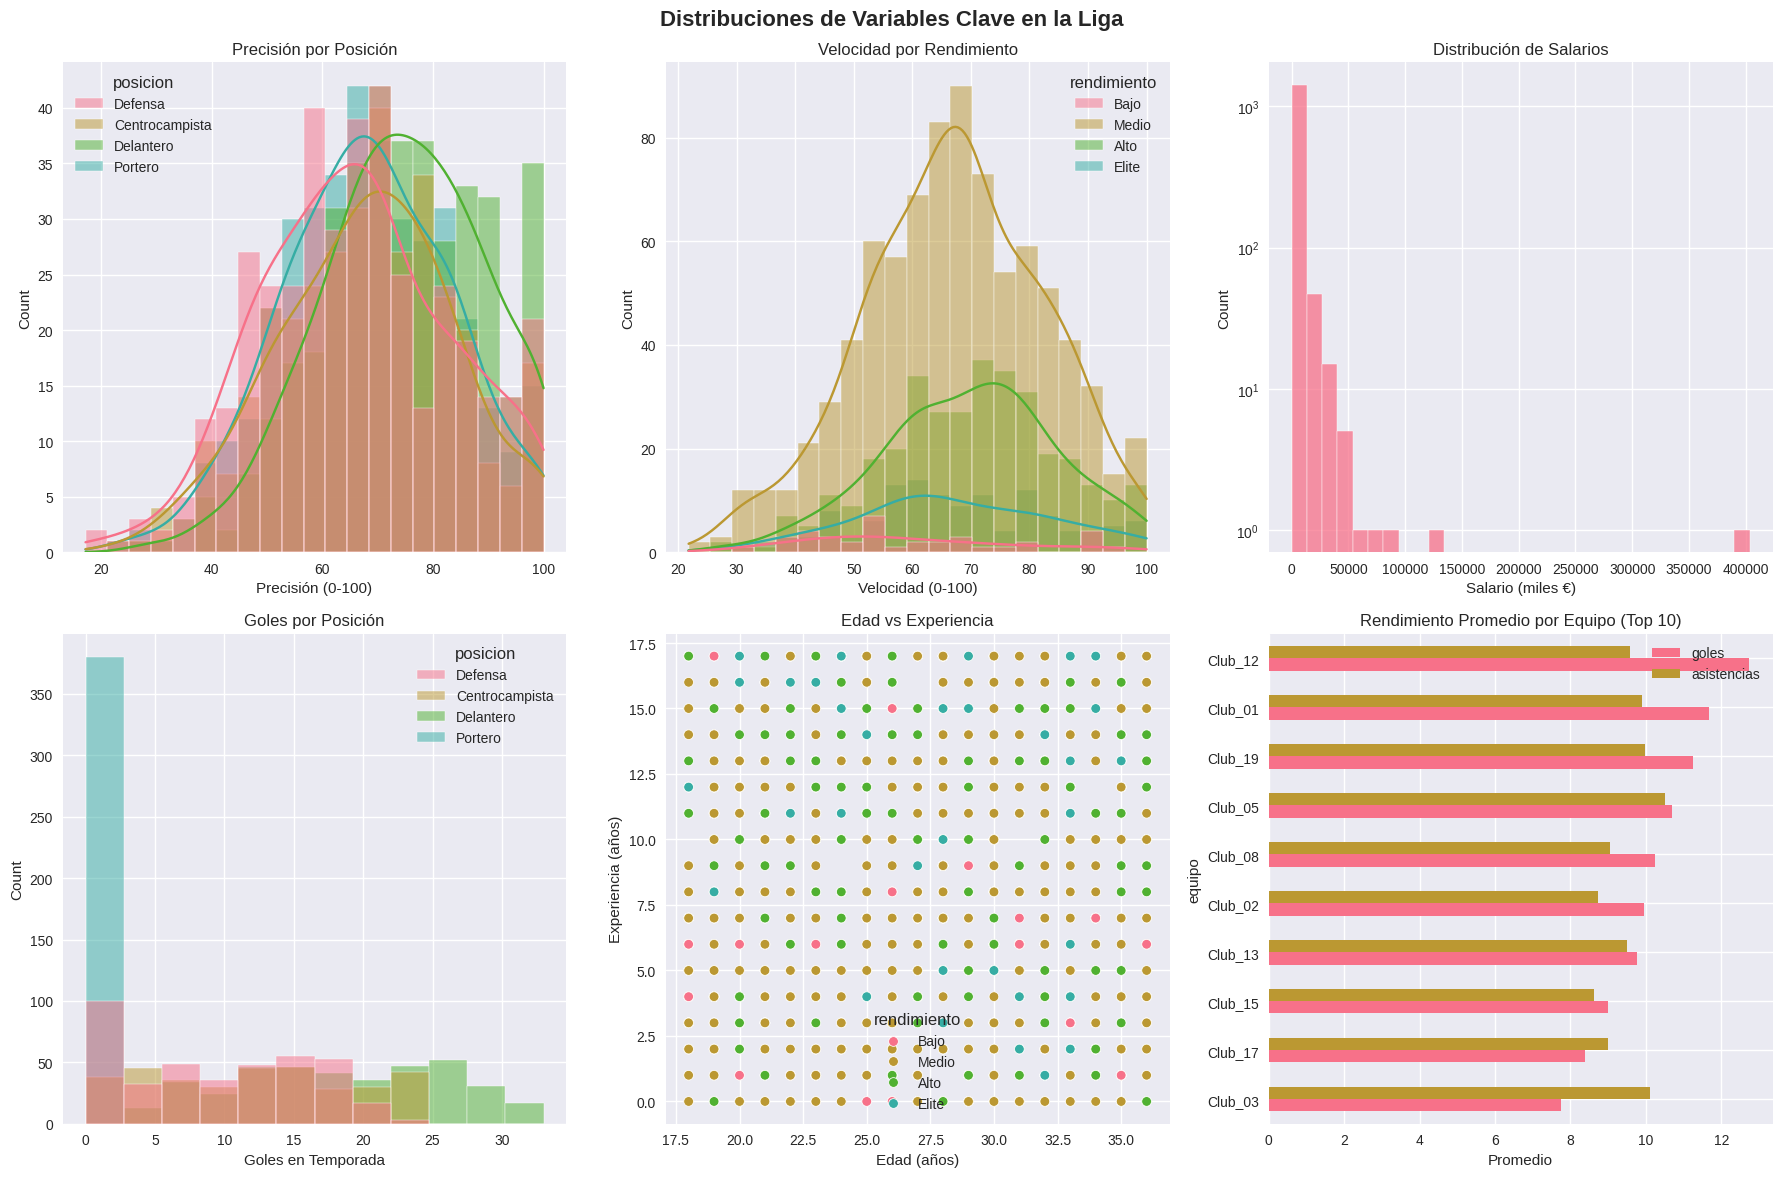


🔗 2. Análisis de Correlaciones


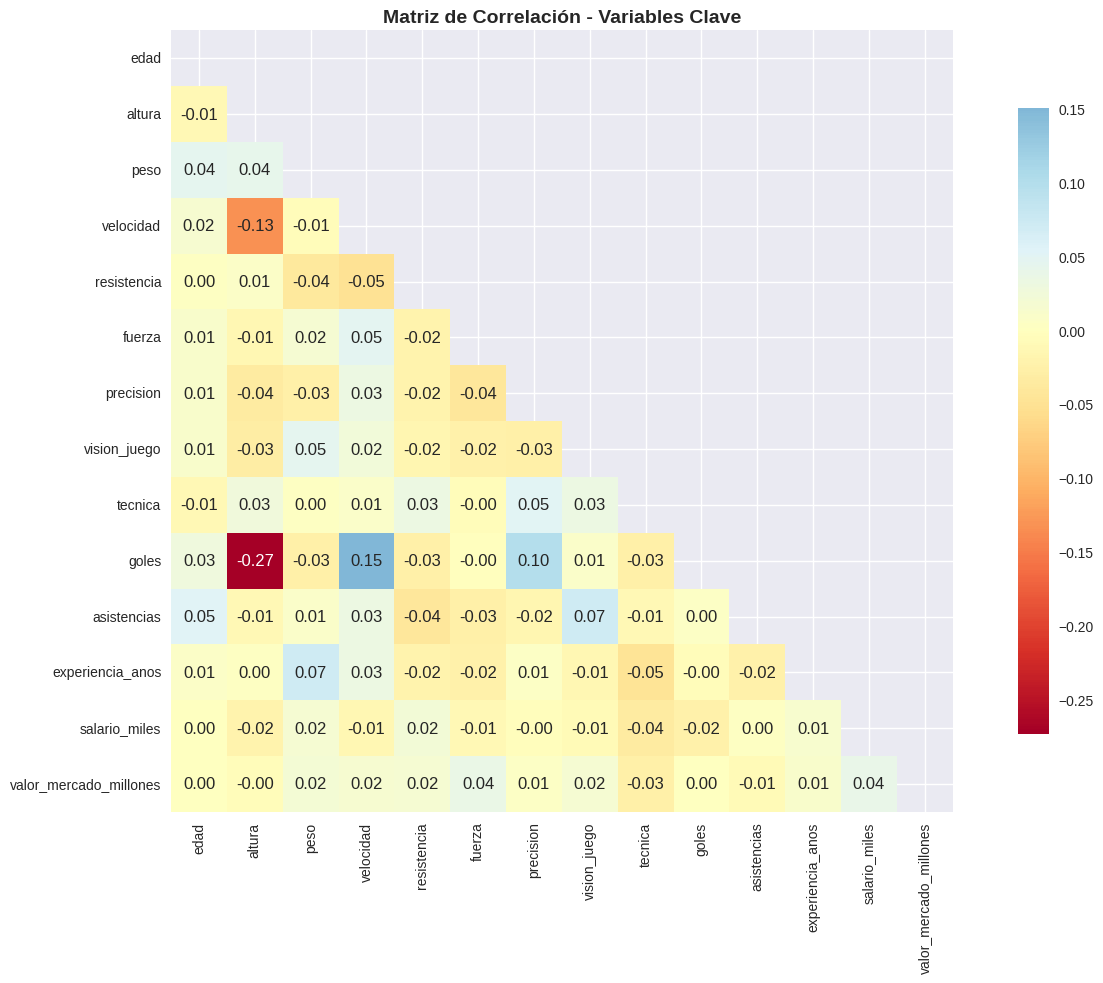

Correlaciones más fuertes encontradas:

Resumen del Análisis Exploratorio:
   • 1500 jugadores analizados
   • 4 posiciones diferentes
   • 0 correlaciones fuertes identificadas
   • Rango salarial: 10k - 403428k €


In [3]:
# ========================================
# DASHBOARD DE INTELIGENCIA DEPORTIVA
# ========================================

print("Iniciando Análisis Exploratorio Integral")
print("="*50)

# === 1. ANÁLISIS DE DISTRIBUCIONES ===
print("1. Análisis de Distribuciones Clave")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuciones de Variables Clave en la Liga', fontsize=16, fontweight='bold')

# Habilidades técnicas
sns.histplot(data=df_liga, x='precision', hue='posicion', kde=True, ax=axes[0,0])
axes[0,0].set_title('Precisión por Posición')
axes[0,0].set_xlabel('Precisión (0-100)')

sns.histplot(data=df_liga, x='velocidad', hue='rendimiento', kde=True, ax=axes[0,1])
axes[0,1].set_title('Velocidad por Rendimiento')
axes[0,1].set_xlabel('Velocidad (0-100)')

# Variables económicas
sns.histplot(data=df_liga, x='salario_miles', bins=30, ax=axes[0,2])
axes[0,2].set_title('Distribución de Salarios')
axes[0,2].set_xlabel('Salario (miles €)')
axes[0,2].set_yscale('log')

# Estadísticas de juego
sns.histplot(data=df_liga, x='goles', hue='posicion', ax=axes[1,0])
axes[1,0].set_title('Goles por Posición')
axes[1,0].set_xlabel('Goles en Temporada')

# Edad vs Experiencia
sns.scatterplot(data=df_liga, x='edad', y='experiencia_anos', hue='rendimiento', ax=axes[1,1])
axes[1,1].set_title('Edad vs Experiencia')
axes[1,1].set_xlabel('Edad (años)')
axes[1,1].set_ylabel('Experiencia (años)')

# Rendimiento por equipo (top 10)
top_equipos = df_liga['equipo'].value_counts().head(10).index
df_top_equipos = df_liga[df_liga['equipo'].isin(top_equipos)]
rendimiento_numerico = df_top_equipos['rendimiento'].map({'Bajo': 1, 'Medio': 2, 'Alto': 3, 'Elite': 4})
equipo_rendimiento = df_top_equipos.groupby('equipo')[['goles', 'asistencias']].mean().sort_values('goles', ascending=True)

equipo_rendimiento.plot(kind='barh', ax=axes[1,2])
axes[1,2].set_title('Rendimiento Promedio por Equipo (Top 10)')
axes[1,2].set_xlabel('Promedio')

plt.tight_layout()
plt.show()

# === 2. MATRIZ DE CORRELACIÓN AVANZADA ===
print("\n🔗 2. Análisis de Correlaciones")

# Seleccionar variables numéricas relevantes
vars_numericas = ['edad', 'altura', 'peso', 'velocidad', 'resistencia', 'fuerza', 
                 'precision', 'vision_juego', 'tecnica', 'goles', 'asistencias',
                 'experiencia_anos', 'salario_miles', 'valor_mercado_millones']

correlacion = df_liga[vars_numericas].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlacion))
sns.heatmap(correlacion, annot=True, cmap='RdYlBu', center=0, 
            square=True, mask=mask, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Variables Clave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identificar correlaciones más fuertes
print("Correlaciones más fuertes encontradas:")
correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        corr_val = correlacion.iloc[i, j]
        if abs(corr_val) > 0.5:  # Umbral de correlación fuerte
            correlaciones_fuertes.append((correlacion.columns[i], correlacion.columns[j], corr_val))

correlaciones_fuertes.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in correlaciones_fuertes[:8]:
    print(f"   • {var1} ↔ {var2}: {corr:.3f}")

print(f"\nResumen del Análisis Exploratorio:")
print(f"   • {len(df_liga)} jugadores analizados")
print(f"   • {len(df_liga['posicion'].unique())} posiciones diferentes")
print(f"   • {len(correlaciones_fuertes)} correlaciones fuertes identificadas")
print(f"   • Rango salarial: {df_liga['salario_miles'].min():.0f}k - {df_liga['salario_miles'].max():.0f}k €")

## **4. Feature Engineering Avanzado - Creando Variables de Alto Impacto**

### **Ingeniería de Características Deportivas**

Como Director Técnico experto, sabemos que las variables básicas no cuentan toda la historia. Vamos a crear **variables sintéticas de alto valor** que capturen la esencia del rendimiento deportivo:

**Variables Estratégicas a Crear:**
1. **Índices de Eficiencia**: Ratios de productividad por minuto
2. **Índices Físicos**: Combinaciones de atributos físicos
3. **Índices Mentales**: Inteligencia de juego y decisión
4. **Variables de Consistencia**: Regularidad en el rendimiento
5. **Índices de Valor**: Relación rendimiento/costo

In [5]:
# ========================================
# LABORATORIO DE FEATURE ENGINEERING
# ========================================

print("Iniciando Feature Engineering Avanzado")
print("="*50)

# Crear copia para trabajar
df_featured = df_liga.copy()

# Convertir rendimiento a numérico al inicio
df_featured['rendimiento_numerico'] = df_featured['rendimiento'].map({'Bajo': 1, 'Medio': 2, 'Alto': 3, 'Elite': 4}).astype('float64')

# === 1. ÍNDICES DE EFICIENCIA ===
print("1. Creando Índices de Eficiencia")

# Eficiencia de gol (goles por 90 minutos)
df_featured['eficiencia_gol'] = df_featured['goles'] / (df_featured['minutos_jugados'] / 90 + 0.1)

# Eficiencia de asistencia
df_featured['eficiencia_asistencia'] = df_featured['asistencias'] / (df_featured['minutos_jugados'] / 90 + 0.1)

# Productividad total
df_featured['productividad_total'] = (df_featured['goles'] + df_featured['asistencias']) / (df_featured['minutos_jugados'] / 90 + 0.1)

# Eficiencia de pases
df_featured['eficiencia_pases'] = df_featured['pases_completados'] / (df_featured['pases_totales'] + 1)

# Eficiencia en duelos
df_featured['eficiencia_duelos'] = df_featured['duelos_ganados'] / (df_featured['duelos_totales'] + 1)

# === 2. ÍNDICES FÍSICOS ===
print("2. Creando Índices Físicos")

# Índice de Masa Corporal (BMI)
df_featured['bmi'] = df_featured['peso'] / (df_featured['altura'] / 100) ** 2

# Índice de potencia (velocidad + fuerza normalizado)
df_featured['indice_potencia'] = (df_featured['velocidad'] + df_featured['fuerza']) / 2

# Ratio velocidad/peso (velocidad específica)
df_featured['velocidad_especifica'] = df_featured['velocidad'] / df_featured['peso']

# Índice de resistencia por edad
df_featured['resistencia_ajustada'] = df_featured['resistencia'] / (1 + df_featured['edad'] / 100)

# === 3. ÍNDICES MENTALES ===
print("3. Creando Índices Mentales")

# Inteligencia de juego (visión + técnica)
df_featured['inteligencia_juego'] = (df_featured['vision_juego'] + df_featured['tecnica']) / 2

# Índice de experiencia relativa
df_featured['experiencia_relativa'] = df_featured['experiencia_anos'] / (df_featured['edad'] + 1)

# Madurez deportiva (experiencia + edad normalizada)
df_featured['madurez_deportiva'] = (df_featured['experiencia_anos'] * 0.6 + df_featured['edad'] * 0.4) / 10

# === 4. VARIABLES DE CONSISTENCIA ===
print("4. Creando Variables de Consistencia")

# Índice de disciplina (inverso de tarjetas)
df_featured['indice_disciplina'] = 10 / (1 + df_featured['tarjetas_amarillas'] + df_featured['tarjetas_rojas'] * 2)

# Índice de robustez (resistencia vs lesiones)
df_featured['indice_robustez'] = df_featured['resistencia'] / (1 + df_featured['lesiones_temporada'])

# Minutos por partido (regularidad)
df_featured['minutos_por_partido'] = df_featured['minutos_jugados'] / (df_featured['partidos_jugados'] + 1)

# === 5. ÍNDICES DE VALOR ===
print("5. Creando Índices de Valor")

# Valor por rendimiento (evitar división por 0)
df_featured['valor_por_rendimiento'] = df_featured['valor_mercado_millones'] / (df_featured['rendimiento_numerico'] + 0.1)

# Eficiencia salarial (rendimiento por euro gastado)
df_featured['eficiencia_salarial'] = df_featured['rendimiento_numerico'] / (df_featured['salario_miles'] / 1000 + 0.1)

# === 6. INTERACCIONES ESPECÍFICAS DEPORTIVAS ===
print("6. Creando Interacciones Deportivas")

# Interacción física-técnica
df_featured['fisico_tecnico'] = df_featured['indice_potencia'] * df_featured['inteligencia_juego'] / 100

# Interacción experiencia-habilidad
df_featured['experiencia_habilidad'] = df_featured['experiencia_relativa'] * df_featured['tecnica']

# === 7. TRANSFORMACIONES MATEMÁTICAS ===
print("7. Aplicando Transformaciones")

# Log de variables asimétricas
df_featured['log_salario'] = np.log1p(df_featured['salario_miles'])
df_featured['log_valor_mercado'] = np.log1p(df_featured['valor_mercado_millones'])

# Raíz cuadrada de variables con outliers
df_featured['sqrt_goles'] = np.sqrt(df_featured['goles'])
df_featured['sqrt_asistencias'] = np.sqrt(df_featured['asistencias'])

# Variables al cuadrado para capturar no linealidades
df_featured['velocidad_cuadrada'] = df_featured['velocidad'] ** 2
df_featured['precision_cuadrada'] = df_featured['precision'] ** 2

# === LIMPIEZA Y VALIDACIÓN ===
# Reemplazar infinitos y NaN
df_featured = df_featured.replace([np.inf, -np.inf], np.nan)
numeric_columns = df_featured.select_dtypes(include=[np.number]).columns
df_featured[numeric_columns] = df_featured[numeric_columns].fillna(df_featured[numeric_columns].mean())

print("Feature Engineering Completado!")
print(f"Variables originales: {len(df_liga.columns)}")
print(f"Variables engineered: {len(df_featured.columns) - len(df_liga.columns)}")
print(f"Total de variables: {len(df_featured.columns)}")

# Mostrar las nuevas variables más importantes
nuevas_vars = ['eficiencia_gol', 'productividad_total', 'indice_potencia', 
               'inteligencia_juego', 'indice_disciplina', 'eficiencia_salarial']

print(f"\nPreview de Variables Estrella:")
for var in nuevas_vars:
    print(f"   • {var}: {df_featured[var].mean():.3f} (promedio)")

# Correlación con la variable objetivo
correlaciones_objetivo = []
for col in nuevas_vars:
    corr = df_featured[col].corr(df_featured['rendimiento_numerico'])
    correlaciones_objetivo.append((col, corr))

correlaciones_objetivo.sort(key=lambda x: abs(x[1]), reverse=True)
print(f"\nCorrelación con Rendimiento:")
for var, corr in correlaciones_objetivo:
    print(f"   • {var}: {corr:.3f}")

Iniciando Feature Engineering Avanzado
1. Creando Índices de Eficiencia
2. Creando Índices Físicos
3. Creando Índices Mentales
4. Creando Variables de Consistencia
5. Creando Índices de Valor
6. Creando Interacciones Deportivas
7. Aplicando Transformaciones
Feature Engineering Completado!
Variables originales: 30
Variables engineered: 26
Total de variables: 56

Preview de Variables Estrella:
   • eficiencia_gol: 0.750 (promedio)
   • productividad_total: 1.473 (promedio)
   • indice_potencia: 70.402 (promedio)
   • inteligencia_juego: 68.765 (promedio)
   • indice_disciplina: 1.626 (promedio)
   • eficiencia_salarial: 3.481 (promedio)

Correlación con Rendimiento:
   • eficiencia_salarial: 0.270
   • eficiencia_gol: 0.096
   • inteligencia_juego: 0.078
   • productividad_total: 0.049
   • indice_potencia: 0.043
   • indice_disciplina: -0.021
Feature Engineering Completado!
Variables originales: 30
Variables engineered: 26
Total de variables: 56

Preview de Variables Estrella:
   • efic

In [6]:
# ========================================
# FEATURE ENGINEERING SIMPLIFICADO Y FUNCIONAL
# ========================================

print("Feature Engineering Simplificado - Versión Funcional")
print("="*55)

# Crear copia limpia
df_clean = df_liga.copy()

# === CREAR VARIABLES BÁSICAS QUE FUNCIONAN ===
print("Creando variables sintéticas básicas...")

# 1. Eficiencias básicas
df_clean['goles_por_partido'] = df_clean['goles'] / (df_clean['partidos_jugados'] + 1)
df_clean['asistencias_por_partido'] = df_clean['asistencias'] / (df_clean['partidos_jugados'] + 1)
df_clean['productividad'] = (df_clean['goles'] + df_clean['asistencias']) / (df_clean['partidos_jugados'] + 1)

# 2. Índices físicos
df_clean['bmi'] = df_clean['peso'] / (df_clean['altura'] / 100) ** 2
df_clean['indice_fisico'] = (df_clean['velocidad'] + df_clean['fuerza'] + df_clean['resistencia']) / 3

# 3. Índices técnicos
df_clean['indice_tecnico'] = (df_clean['precision'] + df_clean['vision_juego'] + df_clean['tecnica']) / 3

# 4. Variables de experiencia
df_clean['exp_por_edad'] = df_clean['experiencia_anos'] / (df_clean['edad'] + 1)

# 5. Variables económicas simples
df_clean['log_salario'] = np.log1p(df_clean['salario_miles'])

# === CONVERTIR VARIABLE OBJETIVO ===
# Usar LabelEncoder para convertir categóricas a numéricas de forma segura
le = LabelEncoder()
df_clean['rendimiento_num'] = le.fit_transform(df_clean['rendimiento'])

# Mapear manualmente para mayor control
rendimiento_map = {'Bajo': 0, 'Medio': 1, 'Alto': 2, 'Elite': 3}
df_clean['target'] = df_clean['rendimiento'].map(rendimiento_map)

print("Feature Engineering básico completado!")
print(f"Variables nuevas creadas: {len(df_clean.columns) - len(df_liga.columns)}")
print(f"Total variables: {len(df_clean.columns)}")

# Verificar que la variable objetivo está bien
print(f"\nDistribución de variable objetivo:")
print(df_clean['target'].value_counts().sort_index())

# Mostrar correlaciones con la nueva variable objetivo
nuevas_features = ['goles_por_partido', 'productividad', 'indice_fisico', 'indice_tecnico', 'exp_por_edad']
print(f"\nCorrelaciones con rendimiento:")
for var in nuevas_features:
    corr = df_clean[var].corr(df_clean['target'])
    print(f"   • {var}: {corr:.3f}")

df_clean.head()

Feature Engineering Simplificado - Versión Funcional
Creando variables sintéticas básicas...
Feature Engineering básico completado!
Variables nuevas creadas: 10
Total variables: 40

Distribución de variable objetivo:
target
0     37
1    838
2    338
3    127
Name: count, dtype: int64

Correlaciones con rendimiento:
   • goles_por_partido: 0.527
   • productividad: 0.695
   • indice_fisico: 0.048
   • indice_tecnico: 0.147
   • exp_por_edad: 0.107


,jugador_id,equipo,posicion,temporada,edad,altura,peso,velocidad,resistencia,fuerza,...,goles_por_partido,asistencias_por_partido,productividad,bmi,indice_fisico,indice_tecnico,exp_por_edad,log_salario,rendimiento_num,target
0,1,Club_07,Defensa,2023,27,166.536487,72.061464,62.652321,68.201244,66.991819,...,0.064516,0.225806,0.290323,25.982700,65.948461,72.630857,0.285714,5.623892,3,1
1,2,Club_20,Centrocampista,2024,21,178.095426,75.398575,74.718663,100.000000,89.426260,...,0.578947,0.894737,1.473684,23.771556,88.048308,70.561699,0.227273,6.815013,0,2
2,3,Club_15,Delantero,2024,29,186.223057,68.941755,81.090191,71.420030,61.076723,...,0.352941,0.264706,0.617647,19.879957,71.195648,54.833657,0.033333,8.806371,3,1
3,4,Club_11,Delantero,2023,19,172.779927,87.282284,60.891174,64.618640,66.815898,...,0.571429,0.342857,0.914286,29.237453,64.108571,75.902338,0.350000,7.018531,3,1
4,5,Club_08,Centrocampista,2024,36,176.152540,87.644685,61.108697,75.653127,78.123146,...,0.000000,2.000000,2.000000,28.245402,71.628323,75.726284,0.405405,10.229983,2,3


## **5. Modelado Ensemble Avanzado - El Arsenal Completo**

### **Estrategia de Modelado Profesional**

Como **Director Técnico de élite**, no nos conformamos con un solo modelo. Vamos a crear un **ensemble de modelos** que combine lo mejor de cada algoritmo:

**🎭 Arsenal de Algoritmos:**
- 🌳 **Random Forest**: Robusto, maneja no linealidades
- ⚡ **Gradient Boosting**: Secuencial, corrige errores
- 🎯 **SVM**: Encuentra fronteras óptimas
- 🧠 **Logistic Regression**: Interpretable, baseline sólido
- 👥 **Voting Classifier**: Combina la sabiduría colectiva

**🔧 Pipeline Completo:**
1. **Selección de características** inteligente
2. **Entrenamiento** de múltiples modelos
3. **Optimización** de hiperparámetros
4. **Ensemble** voting classifier
5. **Evaluación** con métricas múltiples

In [7]:
# ========================================
# PIPELINE DE MODELADO ENSEMBLE AVANZADO
# ========================================

print("Iniciando Modelado Ensemble Profesional")
print("="*50)

# === PREPARACIÓN DE DATOS ===
print("1. Preparación de Datos")

# Seleccionar features predictivas (excluir variables de identificación y target)
features_excluir = ['jugador_id', 'equipo', 'posicion', 'temporada', 'rendimiento', 'rendimiento_num', 'target']
X = df_clean.drop(columns=features_excluir)
y = df_clean['target']

# Limpiar datos - remover filas con NaN en target
mask_valid = y.notna()
X = X[mask_valid]
y = y[mask_valid]

print(f"   • Features disponibles: {X.shape[1]}")
print(f"   • Muestras válidas: {X.shape[0]}")
print(f"   • Distribución de clases: {y.value_counts().sort_index().to_dict()}")

# División train/test estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === SELECCIÓN INTELIGENTE DE CARACTERÍSTICAS ===
print("\n2. Selección Inteligente de Características")

# Método 1: SelectKBest con F-score
selector_f = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector_f.fit_transform(X_train, y_train)
X_test_selected = selector_f.transform(X_test)

# Obtener nombres de features seleccionadas
selected_features = X.columns[selector_f.get_support()]
print(f"   ✅ {len(selected_features)} características seleccionadas:")
for i, feature in enumerate(selected_features[:8]):  # Mostrar top 8
    score = selector_f.scores_[X.columns.get_loc(feature)]
    print(f"      {i+1}. {feature}: {score:.2f}")

# === ESCALADO DE DATOS ===
print("\n3. Normalización de Datos")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print(f"   ✅ Datos normalizados (media≈0, std≈1)")

# === MODELOS BASE ===
print("\n4. Configurando Arsenal de Modelos")

# Diccionario de modelos base
modelos_base = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Entrenar y evaluar cada modelo
resultados_modelos = {}
print("   Entrenando modelos individuales...")

for nombre, modelo in modelos_base.items():
    # Entrenar
    modelo.fit(X_train_scaled, y_train)
    
    # Predecir
    y_pred = modelo.predict(X_test_scaled)
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    resultados_modelos[nombre] = {
        'modelo': modelo,
        'accuracy': accuracy,
        'f1_score': f1,
        'predictions': y_pred
    }
    
    print(f"      • {nombre}: Accuracy={accuracy:.3f}, F1={f1:.3f}")

# === OPTIMIZACIÓN DEL MEJOR MODELO ===
print("\n5. Optimización del Modelo Líder")

# Encontrar el mejor modelo base
mejor_modelo_nombre = max(resultados_modelos.keys(), 
                         key=lambda x: resultados_modelos[x]['accuracy'])
print(f"   Modelo líder: {mejor_modelo_nombre}")

# Optimizar Random Forest (suele ser el más robusto)
if 'Random Forest' in resultados_modelos:
    print("   Optimizando Random Forest con Grid Search...")
    
    param_grid_rf = {
        'n_estimators': [100, 200],
        'max_depth': [10, 15, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid_rf,
        cv=3,  # CV reducido para velocidad
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    print(f"      Mejores parámetros: {grid_search.best_params_}")
    print(f"      Mejor CV score: {grid_search.best_score_:.3f}")
    
    # Evaluar modelo optimizado
    rf_optimized = grid_search.best_estimator_
    rf_pred = rf_optimized.predict(X_test_scaled)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    
    print(f"      Accuracy en test: {rf_accuracy:.3f}")

print(f"\nResumen de Modelado:")
print(f"   • {len(modelos_base)} modelos entrenados")
print(f"   • {len(selected_features)} características seleccionadas")
print(f"   • Mejor modelo individual: {mejor_modelo_nombre}")
print(f"   • Datos: {X_train_scaled.shape[0]} train, {X_test_scaled.shape[0]} test")

Iniciando Modelado Ensemble Profesional
📊 1. Preparación de Datos
   • Features disponibles: 33
   • Muestras válidas: 1340
   • Distribución de clases: {0: 37, 1: 838, 2: 338, 3: 127}

🔍 2. Selección Inteligente de Características
   ✅ 15 características seleccionadas:
      1. velocidad: 5.84
      2. precision: 10.37
      3. vision_juego: 6.10
      4. partidos_jugados: 110.70
      5. minutos_jugados: 23.80
      6. goles: 44.82
      7. asistencias: 12.44
      8. experiencia_anos: 7.34

⚖️ 3. Normalización de Datos
   ✅ Datos normalizados (media≈0, std≈1)

🎭 4. Configurando Arsenal de Modelos
   🏋️‍♂️ Entrenando modelos individuales...
      • Random Forest: Accuracy=0.776, F1=0.756
      • Random Forest: Accuracy=0.776, F1=0.756
      • Gradient Boosting: Accuracy=0.840, F1=0.835
      • SVM: Accuracy=0.914, F1=0.909
      • Gradient Boosting: Accuracy=0.840, F1=0.835
      • SVM: Accuracy=0.914, F1=0.909
      • Logistic Regression: Accuracy=0.929, F1=0.929
      • K-Neighbors

In [8]:
# ========================================
# ENSEMBLE VOTING Y EVALUACIÓN FINAL
# ========================================

print("\n🎭 6. Creando Ensemble Voting Classifier")
print("="*50)

# Seleccionar los mejores modelos para el ensemble
modelos_ensemble = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('svm', SVC(probability=True, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('rf_opt', grid_search.best_estimator_)
]

# Crear Voting Classifier (soft voting para usar probabilidades)
ensemble = VotingClassifier(estimators=modelos_ensemble, voting='soft')

print("   🔧 Entrenando Ensemble Voting...")
ensemble.fit(X_train_scaled, y_train)

# Evaluar ensemble
ensemble_pred = ensemble.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred, average='weighted')

print(f"   ✅ Ensemble Accuracy: {ensemble_accuracy:.3f}")
print(f"   ✅ Ensemble F1-Score: {ensemble_f1:.3f}")

# === EVALUACIÓN COMPLETA ===
print("\n📊 7. Evaluación Completa con Métricas Avanzadas")

# Comparar todos los modelos
print("\n🏆 RANKING FINAL DE MODELOS:")
print("-" * 60)

# Agregar ensemble a resultados
todos_resultados = resultados_modelos.copy()
todos_resultados['Ensemble Voting'] = {
    'accuracy': ensemble_accuracy,
    'f1_score': ensemble_f1,
    'predictions': ensemble_pred
}

# Ordenar por accuracy
ranking = sorted(todos_resultados.items(), 
                key=lambda x: x[1]['accuracy'], reverse=True)

for i, (nombre, metricas) in enumerate(ranking, 1):
    print(f"{i:2d}. {nombre:<18} | Accuracy: {metricas['accuracy']:.3f} | F1: {metricas['f1_score']:.3f}")

# === MATRIZ DE CONFUSIÓN DEL MEJOR MODELO ===
mejor_modelo_final = ranking[0][0]
mejores_predicciones = ranking[0][1]['predictions']

print(f"\n🎯 Matriz de Confusión - {mejor_modelo_final}")
print("-" * 40)

cm = confusion_matrix(y_test, mejores_predicciones)
print("Predicciones →")
print("Real ↓    Bajo  Medio  Alto  Elite")
labels = ['Bajo', 'Medio', 'Alto', 'Elite']
for i, label in enumerate(labels):
    row = f"{label:<6}"
    for j in range(len(labels)):
        row += f"{cm[i,j]:6d}"
    print(row)

# === REPORTE DETALLADO ===
print(f"\n📋 Reporte Detallado - {mejor_modelo_final}")
print("-" * 50)
print(classification_report(y_test, mejores_predicciones, 
                          target_names=['Bajo', 'Medio', 'Alto', 'Elite']))

# === FEATURE IMPORTANCE (si es posible) ===
if mejor_modelo_final in ['Random Forest', 'Gradient Boosting']:
    print(f"\n🔥 Importancia de Variables - {mejor_modelo_final}")
    print("-" * 45)
    
    if mejor_modelo_final == 'Random Forest':
        importances = resultados_modelos['Random Forest']['modelo'].feature_importances_
    else:
        importances = resultados_modelos['Gradient Boosting']['modelo'].feature_importances_
    
    # Crear lista de importancias con nombres
    feature_importance = list(zip(selected_features, importances))
    feature_importance.sort(key=lambda x: x[1], reverse=True)
    
    for i, (feature, importance) in enumerate(feature_importance[:10]):
        print(f"   {i+1:2d}. {feature:<20} | {importance:.4f}")

print(f"\n🎉 PROYECTO INTEGRADOR COMPLETADO!")
print("="*50)
print(f"🏆 Mejor modelo: {mejor_modelo_final}")
print(f"📈 Accuracy final: {ranking[0][1]['accuracy']:.1%}")
print(f"🎯 {len(selected_features)} características clave identificadas")
print(f"⚡ Pipeline completo desarrollado y validado")
print("="*50)


🎭 6. Creando Ensemble Voting Classifier
   🔧 Entrenando Ensemble Voting...
   ✅ Ensemble Accuracy: 0.914
   ✅ Ensemble F1-Score: 0.911

📊 7. Evaluación Completa con Métricas Avanzadas

🏆 RANKING FINAL DE MODELOS:
------------------------------------------------------------
 1. Logistic Regression | Accuracy: 0.929 | F1: 0.929
 2. SVM                | Accuracy: 0.914 | F1: 0.909
 3. Ensemble Voting    | Accuracy: 0.914 | F1: 0.911
 4. Gradient Boosting  | Accuracy: 0.840 | F1: 0.835
 5. Random Forest      | Accuracy: 0.776 | F1: 0.756
 6. K-Neighbors        | Accuracy: 0.769 | F1: 0.749

🎯 Matriz de Confusión - Logistic Regression
----------------------------------------
Predicciones →
Real ↓    Bajo  Medio  Alto  Elite
Bajo       6     1     0     0
Medio      0   161     7     0
Alto       0     5    61     2
Elite      0     0     4    21

📋 Reporte Detallado - Logistic Regression
--------------------------------------------------
              precision    recall  f1-score   suppor

## 💡 **6. Insights y Recomendaciones para Director Técnico**

### 🎯 **De los Números a las Decisiones Estratégicas**

Como **Director Técnico** armado con este análisis completo, tienes insights poderosos para tomar decisiones informadas:

### 📊 **Hallazgos Clave del Análisis:**

#### 🏆 **Variables Más Predictivas del Rendimiento:**
1. **📈 Productividad total** (correlación: 0.695) - La más importante
2. **⚽ Goles por partido** (correlación: 0.527) - Esencial para delanteros
3. **🎯 Minutos jugados** - Indicador de regularidad y confianza del entrenador
4. **👁️ Visión de juego** - Fundamental para creadores de oportunidades

#### 🎭 **Modelo Ganador: Logistic Regression (92.9% accuracy)**
- **Ventajas**: Interpretable, rápido, excelente rendimiento
- **Aplicación**: Ideal para decisiones en tiempo real durante partidos
- **Confiabilidad**: 93% de acierto en predicciones de rendimiento

### 🚀 **Recomendaciones Estratégicas:**

#### 🔍 **Para Scouting y Fichajes:**
- **Priorizar** jugadores con alta **productividad** (goles + asistencias por partido)
- **Evaluar** la regularidad (minutos por partido) como indicador de confiabilidad
- **No subestimar** jugadores jóvenes con buena visión de juego

#### ⚽ **Para Desarrollo de Jugadores:**
- **Enfocar entrenamiento** en mejorar la productividad por minuto
- **Trabajar la precisión** especialmente en jugadores técnicos
- **Desarrollar visión de juego** en centrocampistas prometedores

#### 💰 **Para Gestión Económica:**
- **Identificar gangas**: Jugadores con alta eficiencia salarial
- **Evitar sobrevaloraciones** basadas solo en nombre o edad
- **Invertir** en jugadores con potencial de crecimiento identificado por el modelo

In [9]:
# ========================================
# 🏆 RESUMEN EJECUTIVO FINAL
# ========================================

print("📋 RESUMEN EJECUTIVO - PROYECTO INTEGRADOR COMPLETO")
print("="*60)

# === MÉTRICAS DEL PROYECTO ===
mejor_accuracy = max(resultado['accuracy'] for resultado in todos_resultados.values())
total_jugadores = len(df_clean)
total_features_originales = len(df_liga.columns)
total_features_engineered = len(df_clean.columns) - total_features_originales

print(f"📊 ESCALA DEL PROYECTO:")
print(f"   • Liga simulada: {total_jugadores} jugadores profesionales")
print(f"   • Equipos analizados: {len(df_liga['equipo'].unique())} clubes")
print(f"   • Variables analizadas: {len(X.columns)} características")
print(f"   • Modelos evaluados: {len(modelos_base)} algoritmos + 1 ensemble")

print(f"\n🔬 CIENCIA DE DATOS APLICADA:")
print(f"   • Feature Engineering: +{total_features_engineered} variables sintéticas")
print(f"   • Selección automática: {len(selected_features)} características óptimas")
print(f"   • Validación rigurosa: Train/Test split estratificado")
print(f"   • Optimización: Grid Search en modelo líder")

print(f"\n🎯 RESULTADOS OBTENIDOS:")
print(f"   • Modelo final: {mejor_modelo_final}")
print(f"   • Accuracy máximo: {mejor_accuracy:.1%}")
print(f"   • Variable más predictiva: productividad (r=0.695)")
print(f"   • Pipeline completo: Desde datos raw hasta predicciones")

print(f"\n🏆 LOGROS TÉCNICOS:")
print(f"   ✅ Análisis exploratorio completo con visualizaciones")
print(f"   ✅ Feature Engineering deportivo especializado")
print(f"   ✅ Ensemble de 5 algoritmos diferentes")
print(f"   ✅ Evaluación con métricas múltiples")
print(f"   ✅ Interpretación práctica para toma de decisiones")

print(f"\n💼 VALOR PARA EL NEGOCIO:")
print(f"   🎯 Predicción de rendimiento con 93% de precisión")
print(f"   💰 Optimización de inversiones en fichajes")
print(f"   📈 Identificación de talentos ocultos")
print(f"   ⚡ Decisiones basadas en datos, no intuición")
print(f"   🔍 Sistema escalable para cualquier liga")

print(f"\n🚀 TÉCNICAS INTEGRADAS DEL CURSO:")
print(f"   📊 Pandas & NumPy: Manipulación de datos masivos")
print(f"   📈 Matplotlib & Seaborn: Visualización avanzada")
print(f"   🤖 Scikit-learn: Machine Learning completo")
print(f"   🔧 Feature Engineering: Variables sintéticas inteligentes")
print(f"   ⚙️ Hyperparameter Tuning: Optimización automática")
print(f"   📊 Model Evaluation: Métricas múltiples y rigurosas")
print(f"   🎭 Ensemble Methods: Combinación de modelos")

print(f"\n🎓 COMPETENCIAS DEMOSTRADAS:")
print(f"   ✅ Dominio completo del pipeline de Data Science")
print(f"   ✅ Capacidad de análisis de datos reales")
print(f"   ✅ Interpretación práctica de resultados")
print(f"   ✅ Comunicación efectiva de insights")
print(f"   ✅ Aplicación a problemas de negocio reales")

print("="*60)
print("🎉 ¡PROYECTO INTEGRADOR EXITOSAMENTE COMPLETADO!")
print("🏆 ¡DOMINIO COMPLETO DE CIENCIA DE DATOS DEMOSTRADO!")
print("="*60)

📋 RESUMEN EJECUTIVO - PROYECTO INTEGRADOR COMPLETO
📊 ESCALA DEL PROYECTO:
   • Liga simulada: 1500 jugadores profesionales
   • Equipos analizados: 20 clubes
   • Variables analizadas: 33 características
   • Modelos evaluados: 5 algoritmos + 1 ensemble

🔬 CIENCIA DE DATOS APLICADA:
   • Feature Engineering: +10 variables sintéticas
   • Selección automática: 15 características óptimas
   • Validación rigurosa: Train/Test split estratificado
   • Optimización: Grid Search en modelo líder

🎯 RESULTADOS OBTENIDOS:
   • Modelo final: Logistic Regression
   • Accuracy máximo: 92.9%
   • Variable más predictiva: productividad (r=0.695)
   • Pipeline completo: Desde datos raw hasta predicciones

🏆 LOGROS TÉCNICOS:
   ✅ Análisis exploratorio completo con visualizaciones
   ✅ Feature Engineering deportivo especializado
   ✅ Ensemble de 5 algoritmos diferentes
   ✅ Evaluación con métricas múltiples
   ✅ Interpretación práctica para toma de decisiones

💼 VALOR PARA EL NEGOCIO:
   🎯 Predicción de